In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков
from sklearn.preprocessing import LabelEncoder # кодировка символов в числовые значения
from sklearn.preprocessing import MinMaxScaler # нормализация

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# загрузка данных
train = pd.read_csv('/content/mushrooms.csv')

In [ ]:
# все категории таблицы
for column in train.columns:
    unique_values = train[column].unique()
    # print(f"Уникальные значения в столбце '{column}': {unique_values}")

In [ ]:
# преобразование категориальных меток в числовые значения
labelencoder = LabelEncoder()

for col in train.columns:
    train[col] = labelencoder.fit_transform(train[col])

In [ ]:
# все категории таблицы (числовые)
for column in train.columns:
    unique_values = train[column].unique()
    #print(f"Уникальные значения в столбце '{column}': {unique_values}")

In [ ]:
# общая статистика
train.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [ ]:
# в данных нет пропусков, все типы - int64
# train.info()

In [ ]:
# нормализация мин-макс (МОЖНО НЕ ДЕЛАТЬ ПРИ ТАКИХ ЗНАЧЕНИЯХ, до ~20)
# scaler_mm = MinMaxScaler()

# train[['mm-cap-shape','mm-cap-surface', 'mm-cap-color', 'mm-odor', 'mm-gill-color', 'mm-stalk-root', 'mm-stalk-surface-above-ring', 'mm-stalk-surface-below-ring', 'mm-stalk-color-above-ring', 'mm-stalk-color-below-ring', 'mm-veil-color', 'mm-ring-number', 'mm-ring-type', 'mm-spore-print-color', 'mm-population', 'mm-habitat']] = scaler_mm.fit_transform(train[['cap-shape','cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']])
# train.head()

In [ ]:
# (МОЖНО НЕ ДЕЛАТЬ, т.к. НЕ БЫЛО НОРМАЛИЗАЦИИ)

#train_norm = train.copy()


# удаление старых столбцов после нормализации
#columns_to_drop = ['veil-type','cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
#train_norm.drop(columns=columns_to_drop, inplace=True)

#train_norm.head()

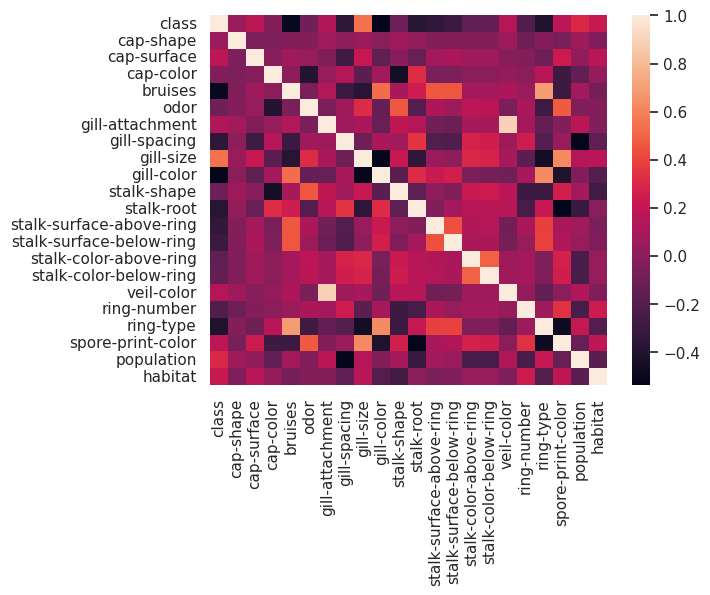

In [ ]:
# также удаляется veil-type (тип оболочки), т.к. данный критерий линейно зависим от остальных параметров, это было заметно по тепловой карте
columns_to_drop = ['veil-type']
train.drop(columns=columns_to_drop, inplace=True)

sns.heatmap(train.corr(numeric_only = True));

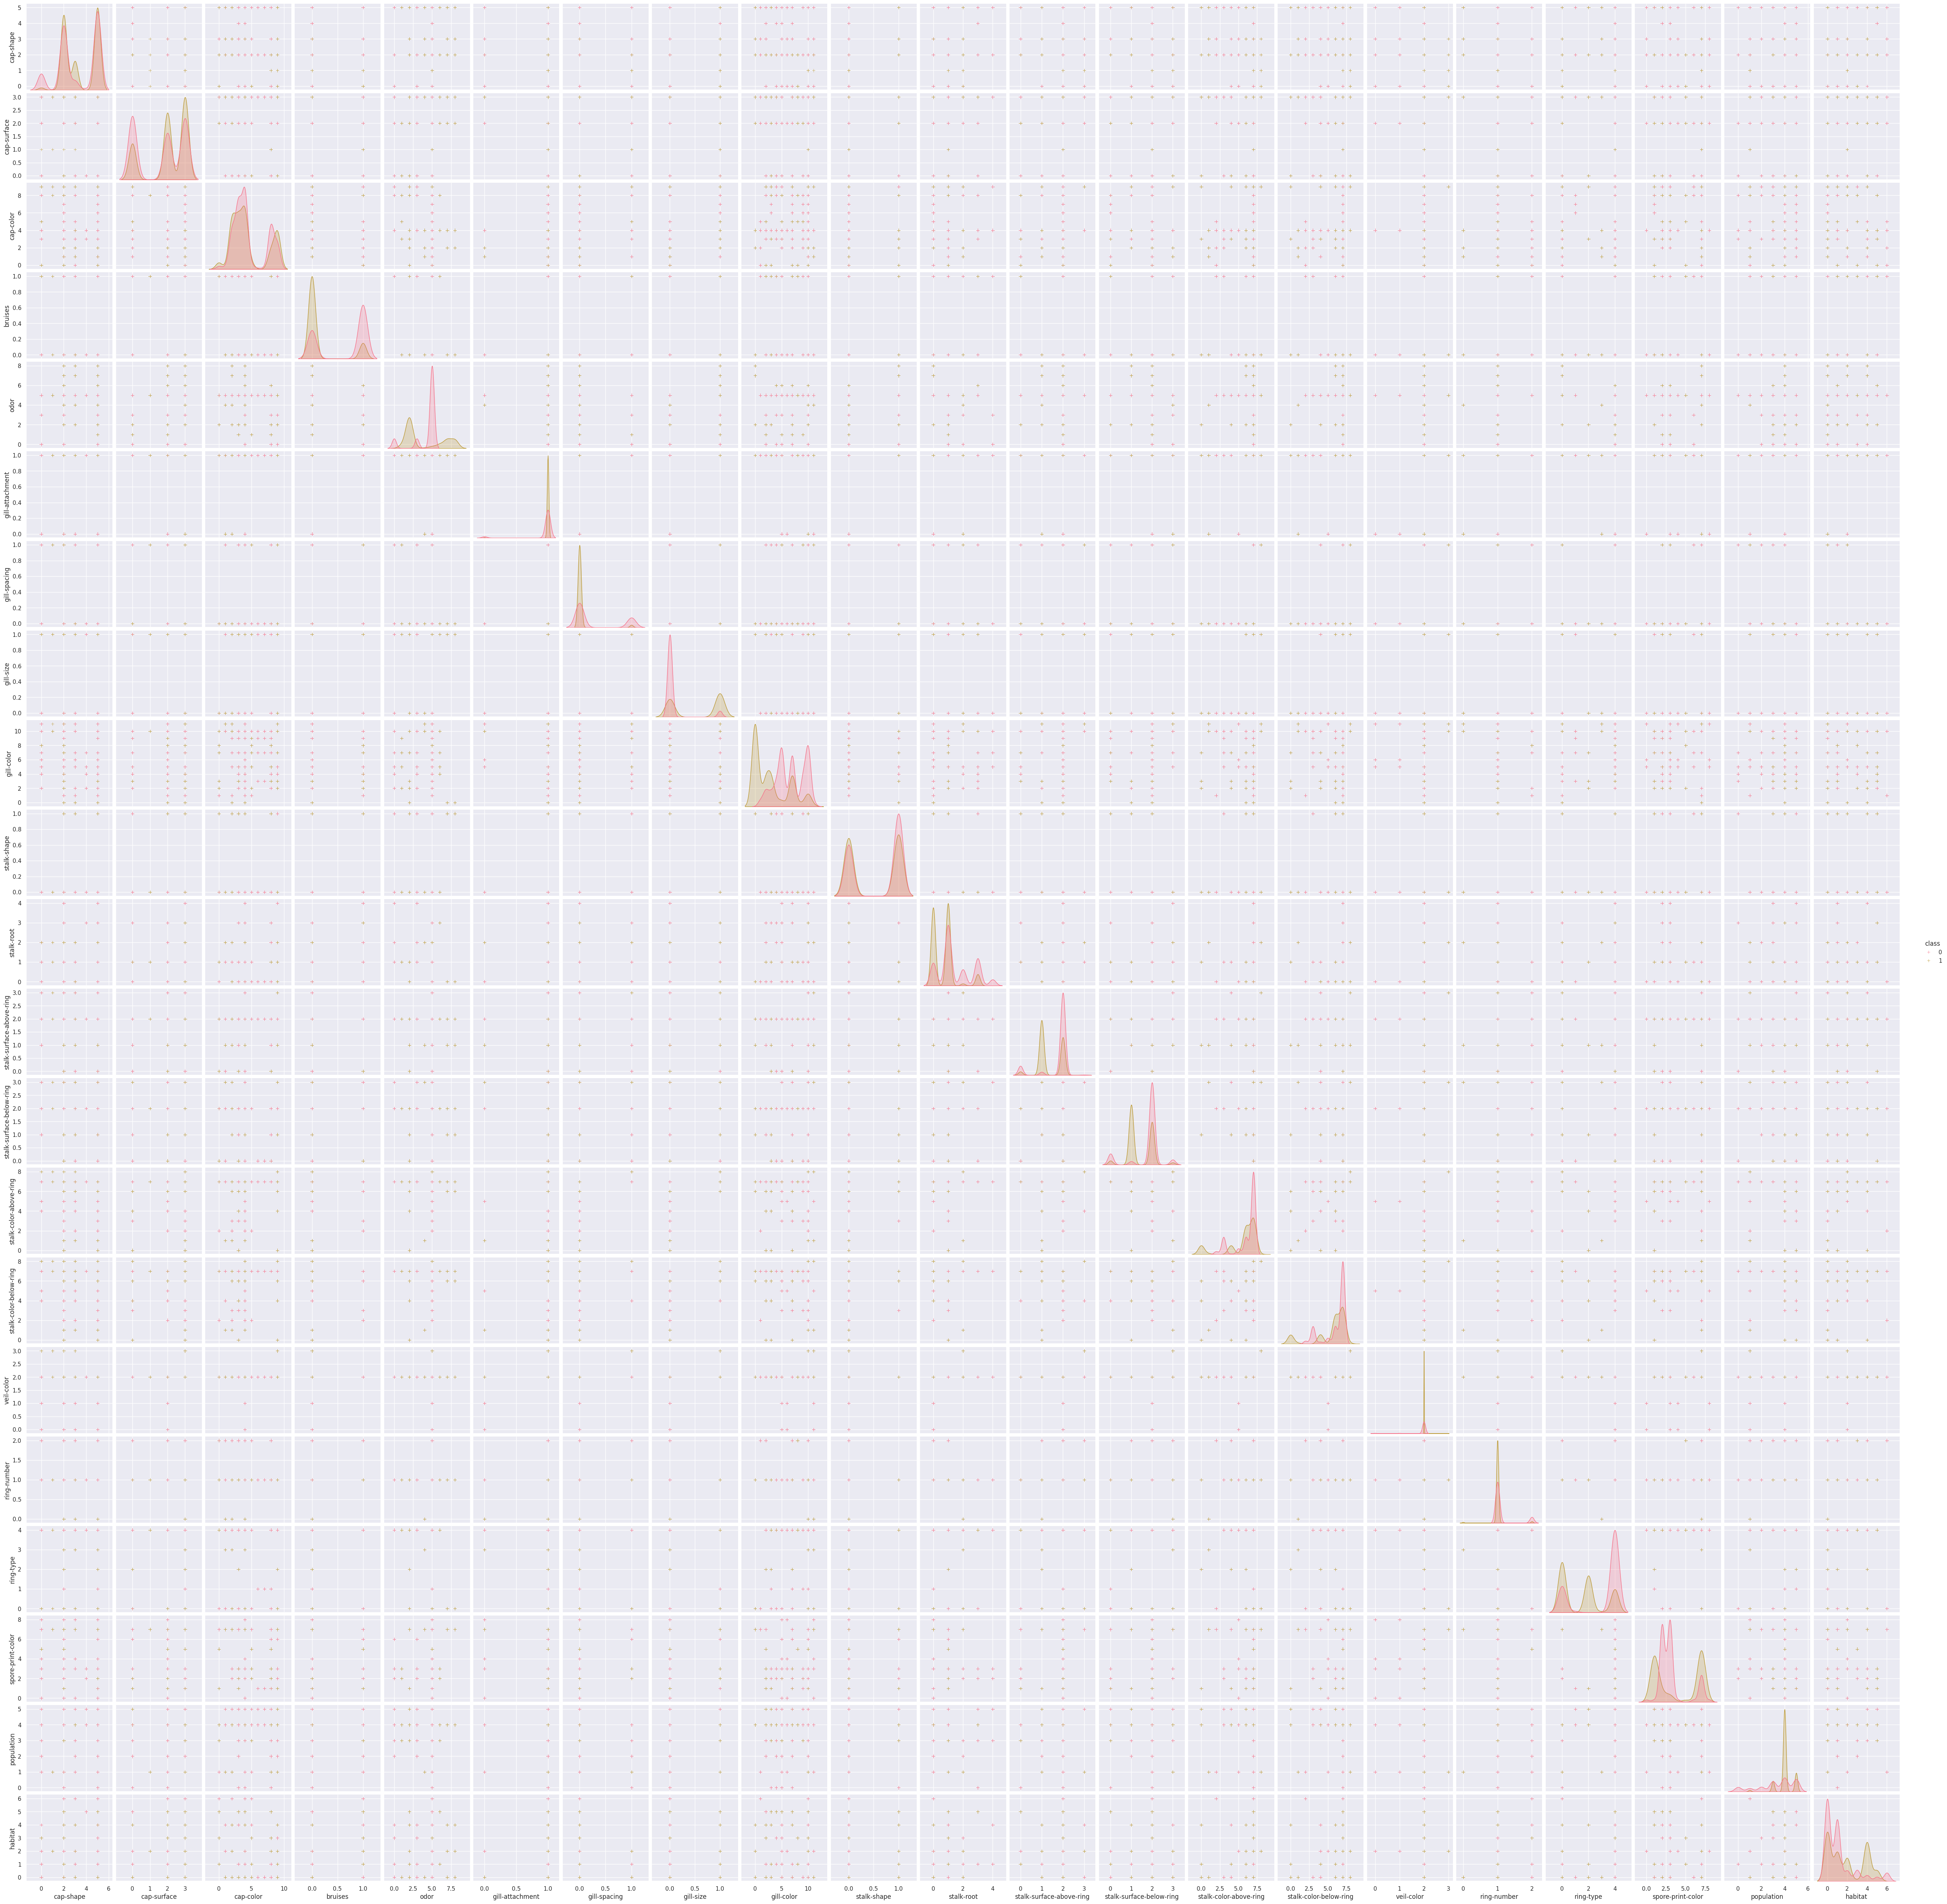

In [ ]:
# Парный график

sns.pairplot(train, hue='class', markers='+')
plt.show()

In [ ]:
# теперь проверим количество строк, которое принадлежит каждому классу:

train['class'].value_counts()

,count
class,
0,4208
1,3916


In [ ]:
X = train.drop(['class'], axis=1)
y = train['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (8124, 21) | y shape: (8124,) 


In [ ]:
import scipy.stats as stats

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=15, stratify=y)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.014360163835734461, pvalue=0.9885429934721774, df=8122.0)

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  # print(cv_results)
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.945015 (0.015682)
LDA: 0.937636 (0.017823)
KNN: 0.993016 (0.005223)
CART: 0.999588 (0.001235)
NB: 0.932706 (0.014569)
SVC: 0.998357 (0.002012)


In [ ]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test) # результаты тестовой выборки
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res) # точность

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.9556923076923077
sk LDA prediction: [1 1 0 ... 0 0 1]
sk transformed features
[[-2.0827104   1.66067354  1.63032791 -1.93511918 -1.52860411]]


In [ ]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
cart_pred_res = cart.predict(X_test)
cart_accuracy = accuracy_score(y_test, cart_pred_res)

print(f'CART accuracy: {cart_accuracy}')
print(f'CART prediction: {cart_pred_res}')

CART accuracy: 1.0
CART prediction: [1 1 0 ... 0 0 1]


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred_res = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred_res)

print(f'CART accuracy: {cart_accuracy}')
print(f'CART prediction: {cart_pred_res}')

CART accuracy: 1.0
CART prediction: [1 1 0 ... 0 0 1]


<Axes: title={'center': 'KNN surface with original features'}>

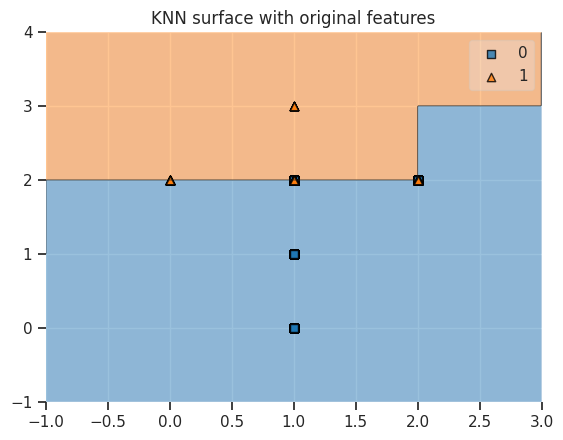

In [ ]:
# KNN

from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['ring-number',	'veil-color']].values

y_2d = y_s.values


sk_lda1 = KNeighborsClassifier()
sk_lda1.fit(X_2d, y_2d)

plt.title('KNN surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'KNN surface with original features'}>

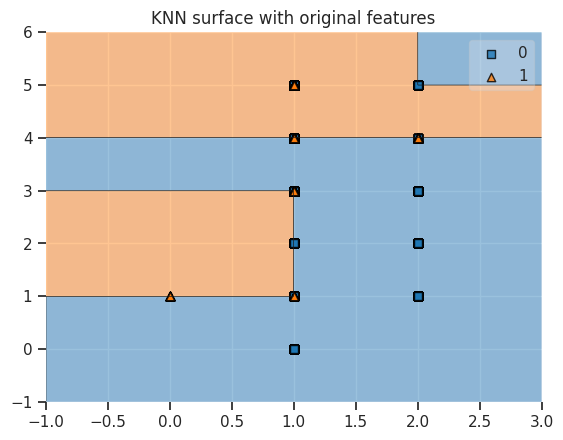

In [ ]:
# KNN

from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['ring-number',	'population']].values

y_2d = y_s.values


sk_lda1 = KNeighborsClassifier()
sk_lda1.fit(X_2d, y_2d)

plt.title('KNN surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'KNN surface with original features'}>

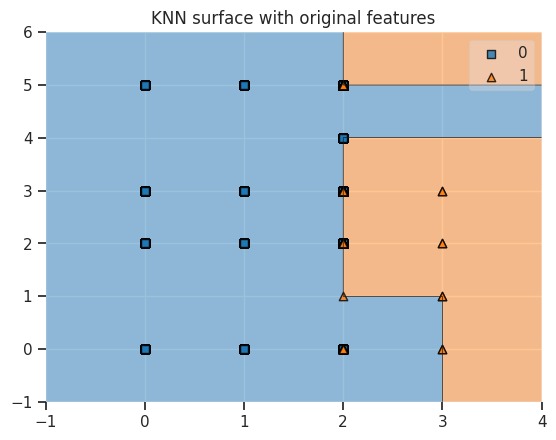

In [ ]:
# KNN

from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['veil-color',	'cap-shape']].values

y_2d = y_s.values


sk_lda1 = KNeighborsClassifier()
sk_lda1.fit(X_2d, y_2d)

plt.title('KNN surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'CART surface with original features'}>

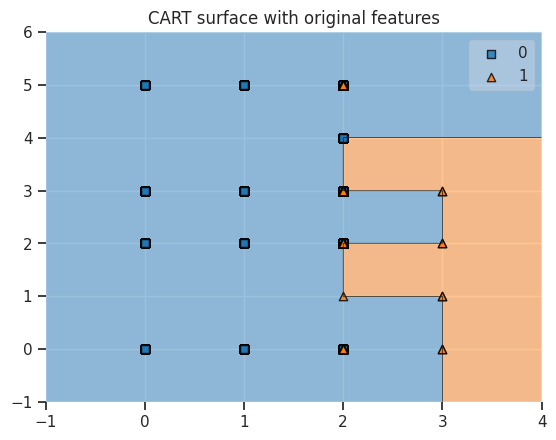

In [ ]:
# Tree Classifier
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['veil-color',	'cap-shape']].values

y_2d = y_s.values


sk_lda1 = DecisionTreeClassifier()
sk_lda1.fit(X_2d, y_2d)

plt.title('CART surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'CART surface with original features'}>

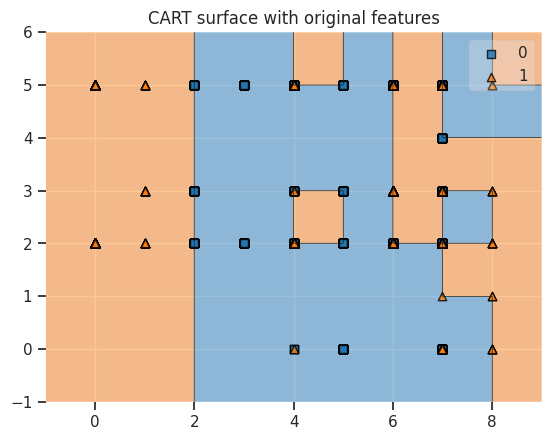

In [ ]:
# Tree Classifier
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['stalk-color-below-ring',	'cap-shape']].values

y_2d = y_s.values


sk_lda1 = DecisionTreeClassifier()
sk_lda1.fit(X_2d, y_2d)

plt.title('CART surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

In [ ]:
# DecisionTreeClassifier()
# KNeighborsClassifier()
# LinearDiscriminantAnalysis(solver='eigen')
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y_test, predicted) # Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.99
Precision (confidence when predicting a 1): 0.99
Detail:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2946
           1       1.00      0.99      0.99      2741

    accuracy                           0.99      5687
   macro avg       0.99      0.99      0.99      5687
weighted avg       0.99      0.99      0.99      5687

